In [1]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint

In [22]:
data = np.zeros(50)
data[0] = 1.

In [23]:
print(data)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [24]:
result_1 = proportion_confint(sum(data), len(data), method='normal')

In [63]:
import scipy.stats as st
print(st.norm.ppf(0.975))

1.959963984540054


In [66]:
def my_proportion_confint(data, alpha = 0.05, method = 'normal'):
    import numpy as np
    import scipy.stats as st
    n_size = len(data)
    p = sum(data)
    p_mean = data.mean()
    z_alpha = st.norm.ppf(1 - alpha / 2.)
    lower_bound = p_mean - (z_alpha * np.sqrt(p_mean * (1 - p_mean) / n_size))
    upper_bound = p_mean + (z_alpha * np.sqrt(p_mean * (1 - p_mean) / n_size))
    return (lower_bound, upper_bound)

In [65]:
print(my_proportion_confint(data)[0])

-0.018805307081790974


In [9]:
result_2_wilson = proportion_confint(sum(data), len(data), alpha=0.05, method='wilson')

In [10]:
print(result_2_wilson)

(0.003539259271646236, 0.10495443589637815)


In [27]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [28]:
n_samples = samplesize_confint_proportion(0.02, 0.01)

In [31]:
print(np.ceil(n_samples))

753.0


In [52]:
p = np.linspace(0,1,101)

In [58]:
y = [np.ceil((samplesize_confint_proportion(x, 0.01))) for x in p]

In [45]:
import matplotlib.pyplot as plt

In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


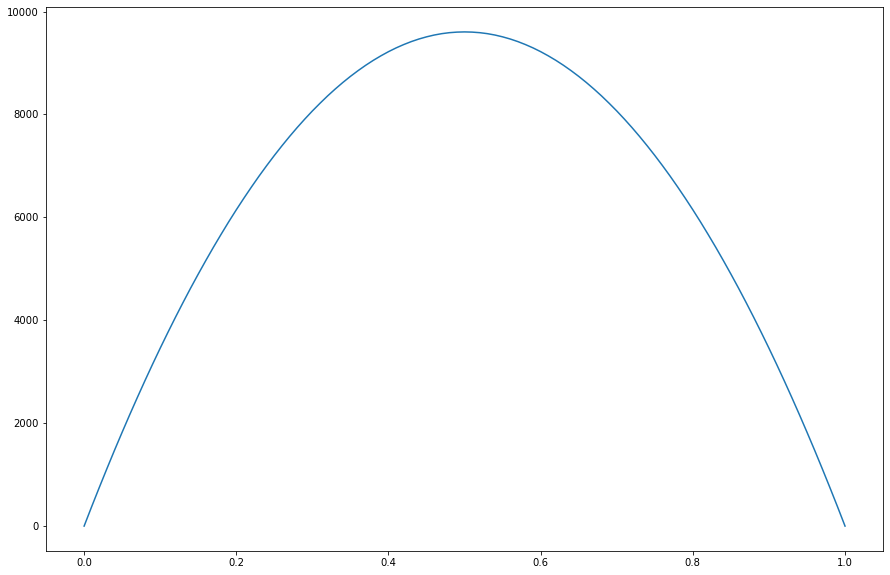

In [59]:
plt.figure(figsize=(15,10))
plt.plot(p,y)

In [60]:
print('p_max = {}'.format(np.max(y)))

p_max = 9604.0
